# Développez un programme d'IA pour la prédiction des faillites d'entreprises

##### Objectif : Utilisation des modèles ensemblistes (Bagging, Boosting, Stacking) pour aider à détecter les entreprises proches de la faillite.

Le dataset possède 95 features (X1-X95) et une target.  
Les features représentent des indicateurs définis par les réglementations commerciaux de la Bourse.  
La target est appelé "Bankrupt ?", qui a la valeur 0 si l'entreprise n'a pas fait faillite, et la valeur 1 si l'entreprise a fait faillite.  

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import decomposition
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

### Sommaire

[Exploration des données](#chapter1)  
[Presprocessing](#chapter2)  


[Standardisation](#section1)  
[Normalisation](#section2)  
[PCA](#section3)  
[df sans PCA](#section4)

___________________

## Exploration <a class="anchor" id="chapter1"></a>

In [2]:
#read the data
data = pd.read_csv('data/data.csv')
pd.options.display.max_columns = None
display(data)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [3]:
#replace the column's names
data.columns = [c.replace(" ","", 1) if c.startswith(' ') else c for c in data.columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [5]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [6]:
data['Bankrupt?']

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [7]:
data.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
data.shape

(6819, 96)

In [9]:
df_10 = data.iloc[:,0:10] #10 premières colonnes du dataset

In [10]:
df_10

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475
...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498


<function matplotlib.pyplot.show(close=None, block=None)>

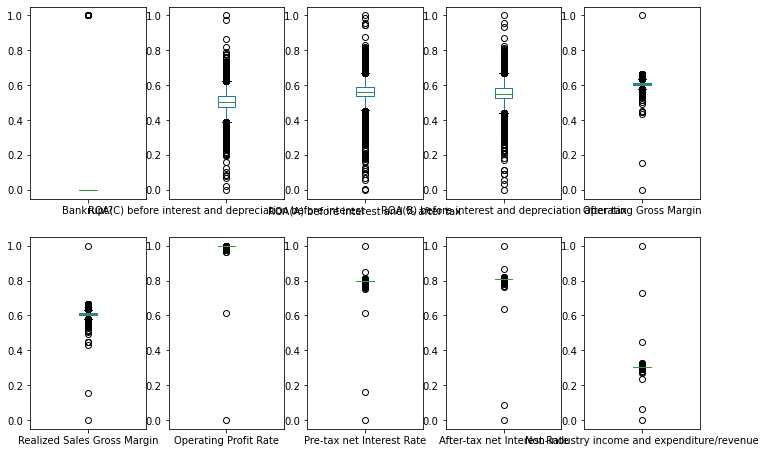

In [11]:
df_10.plot(kind='box', subplots=True, layout=(3, 5), figsize=(12, 12));
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

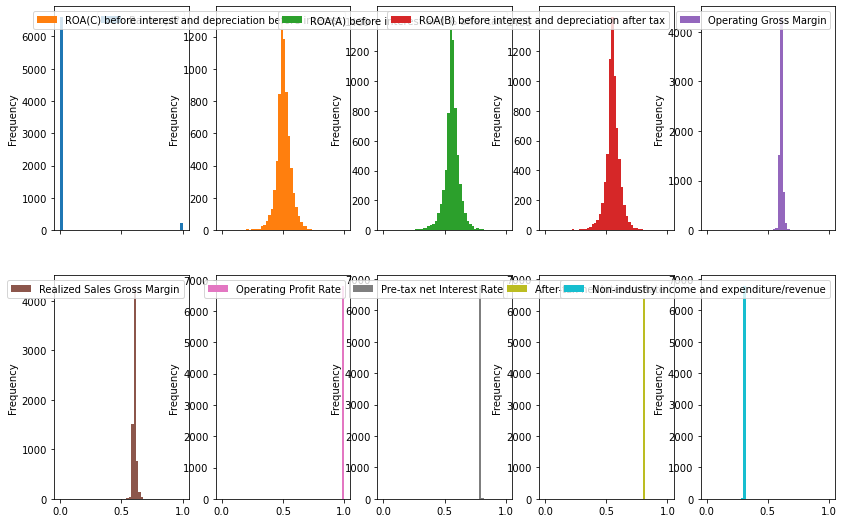

In [12]:
df_10.plot(kind='hist', subplots=True, layout=(3, 5), figsize=(14, 14), bins=50);
plt.show

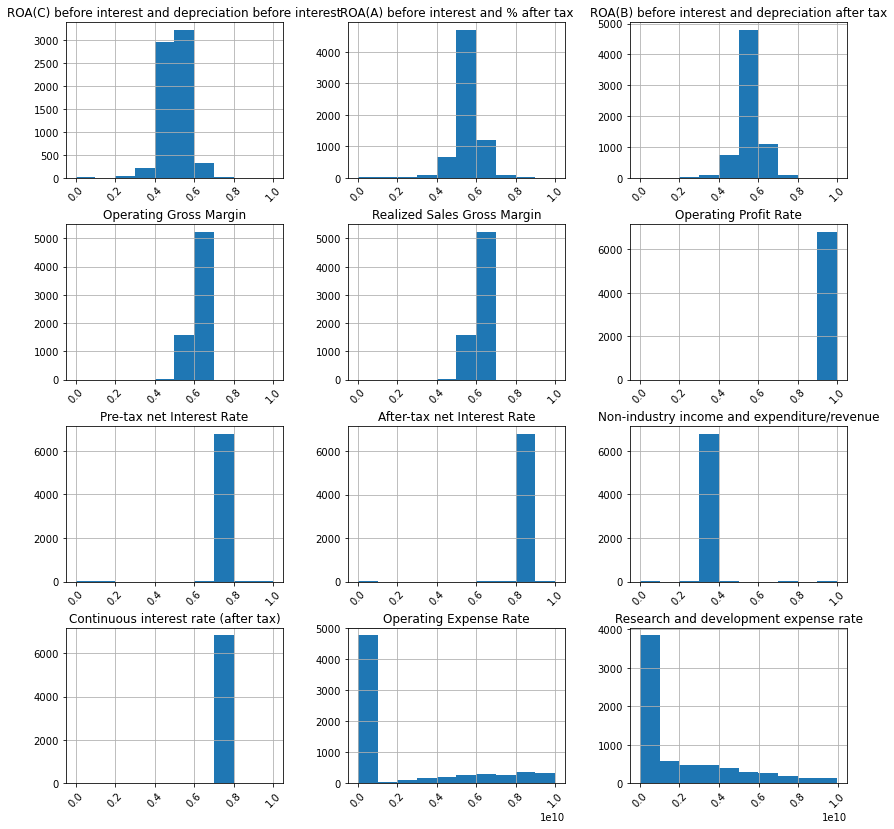

In [13]:
data.iloc[:, 1:13].hist(figsize=(14,14), xrot=45)
plt.show()

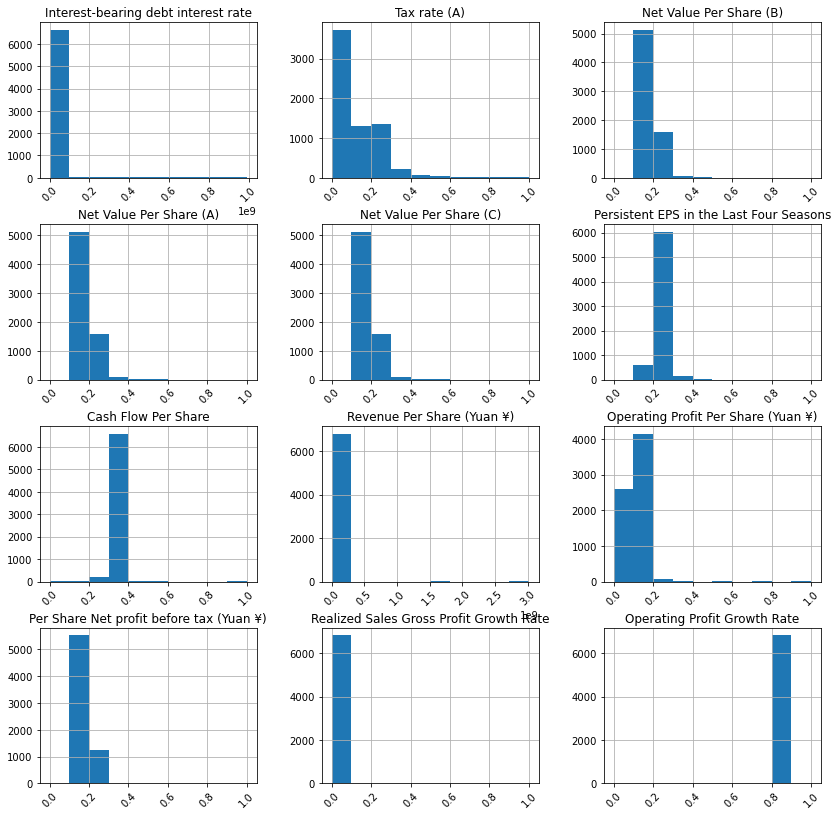

In [14]:
data.iloc[:, 14:26].hist(figsize=(14,14), xrot=45)
plt.show()

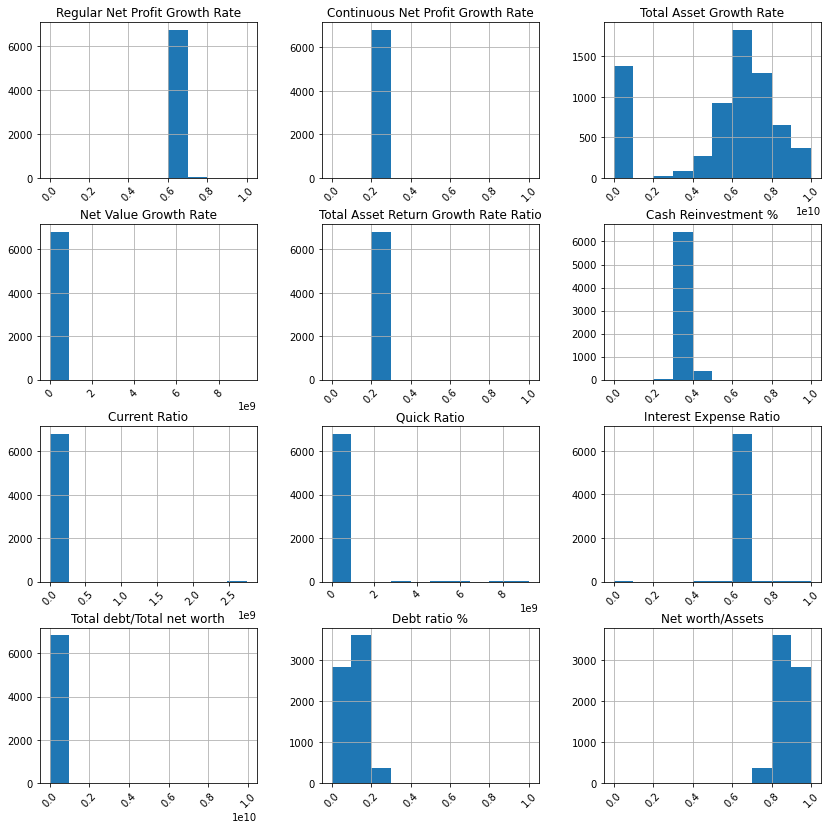

In [15]:
data.iloc[:, 27:39].hist(figsize=(14,14), xrot=45)
plt.show()

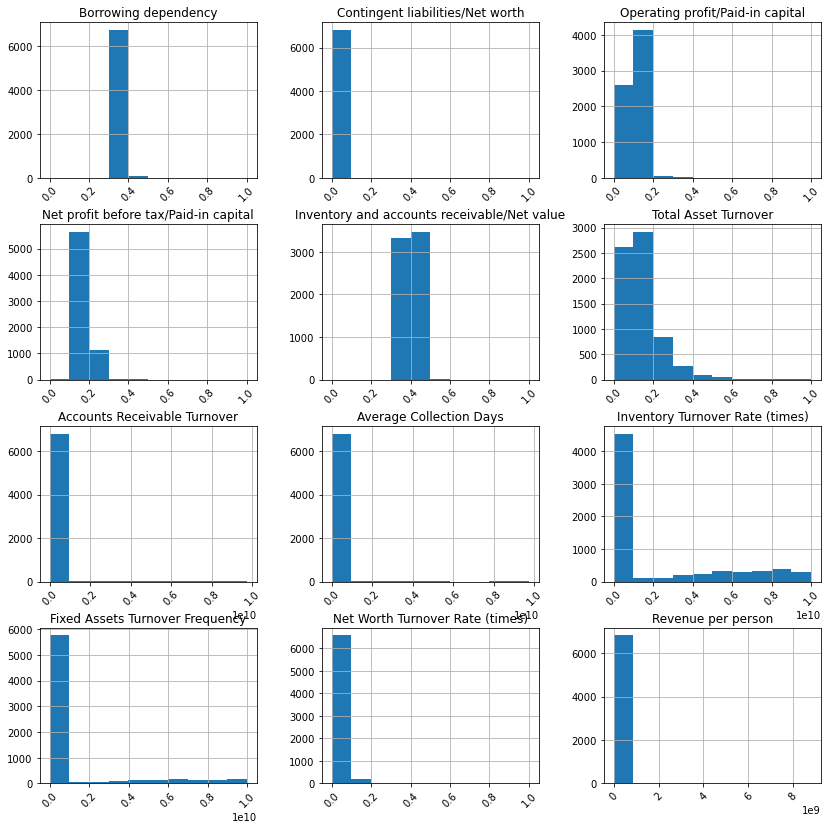

In [16]:
data.iloc[:, 40:52].hist(figsize=(14,14), xrot=45)
plt.show()

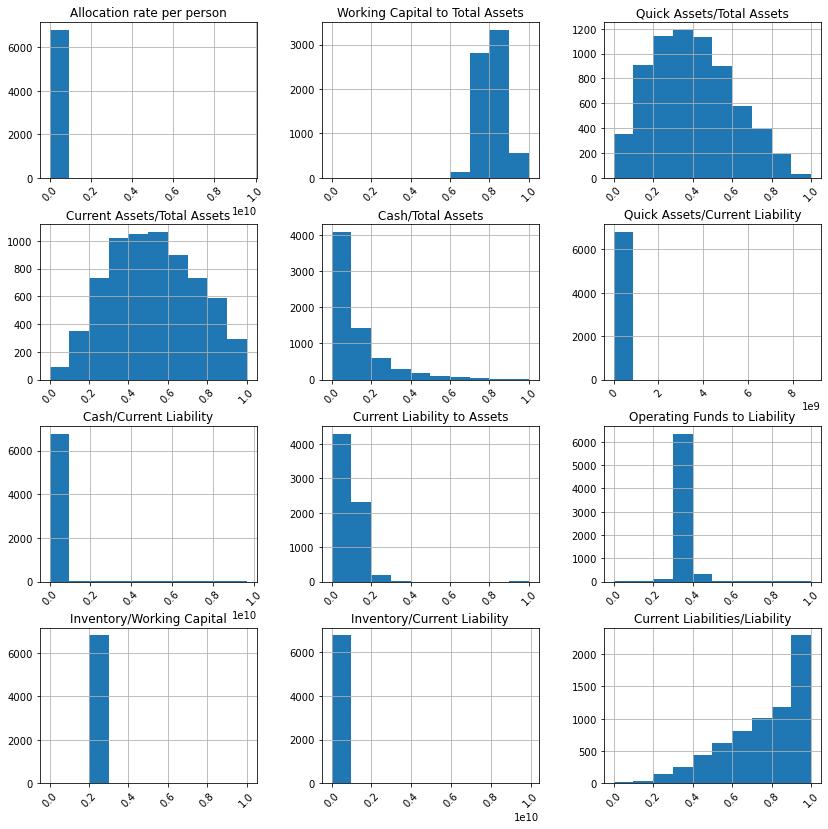

In [17]:
data.iloc[:, 53:65].hist(figsize=(14,14), xrot=45)
plt.show()

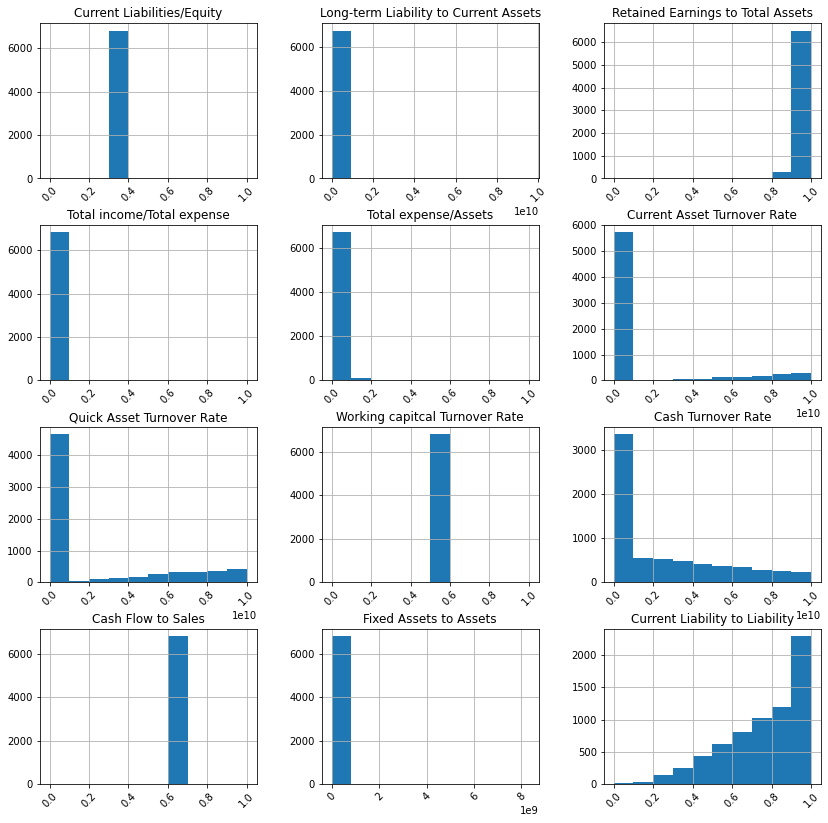

In [18]:
data.iloc[:, 66:78].hist(figsize=(14,14), xrot=45)
plt.show()

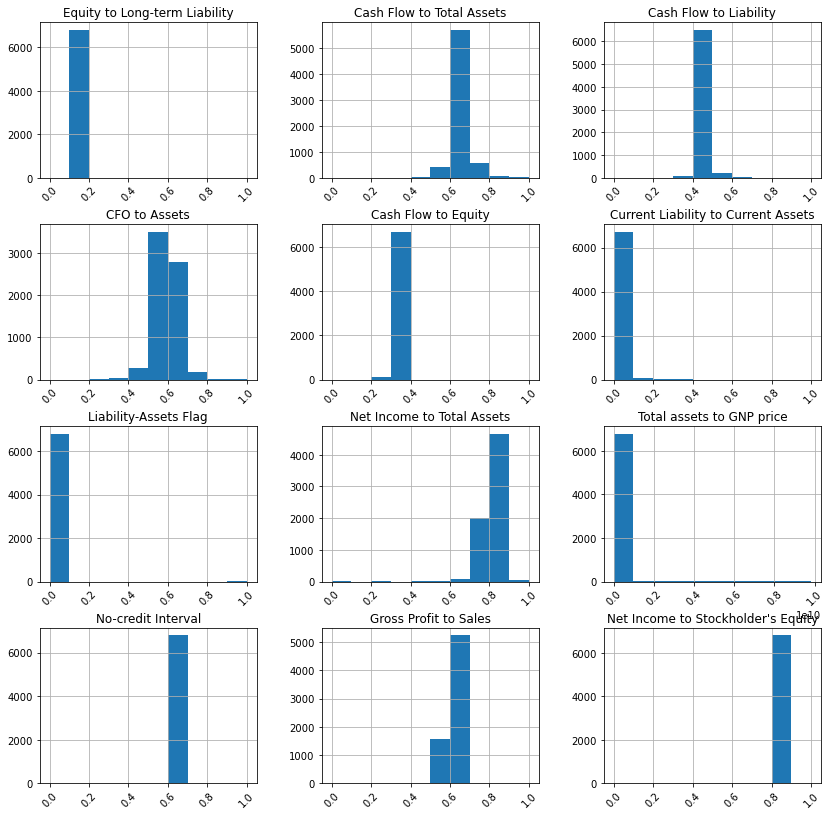

In [19]:
data.iloc[:, 79:91].hist(figsize=(14,14), xrot=45)
plt.show()

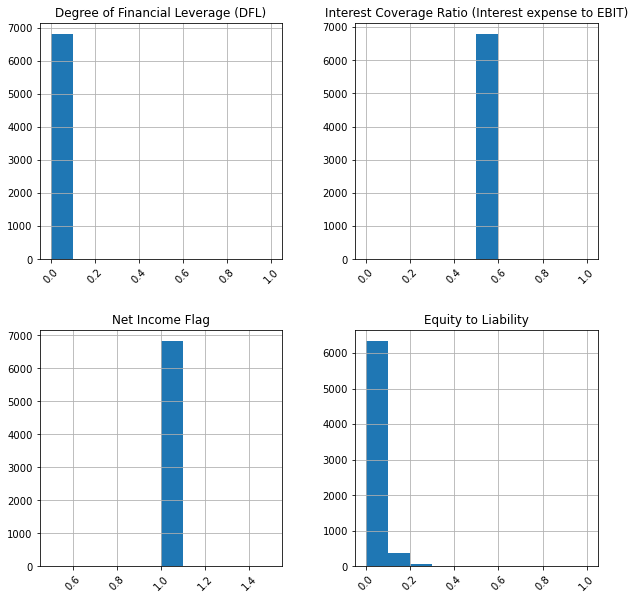

In [20]:
data.iloc[:, 92:].hist(figsize=(10,10), xrot=45)
plt.show()

In [21]:
#sns.pairplot(df_10)

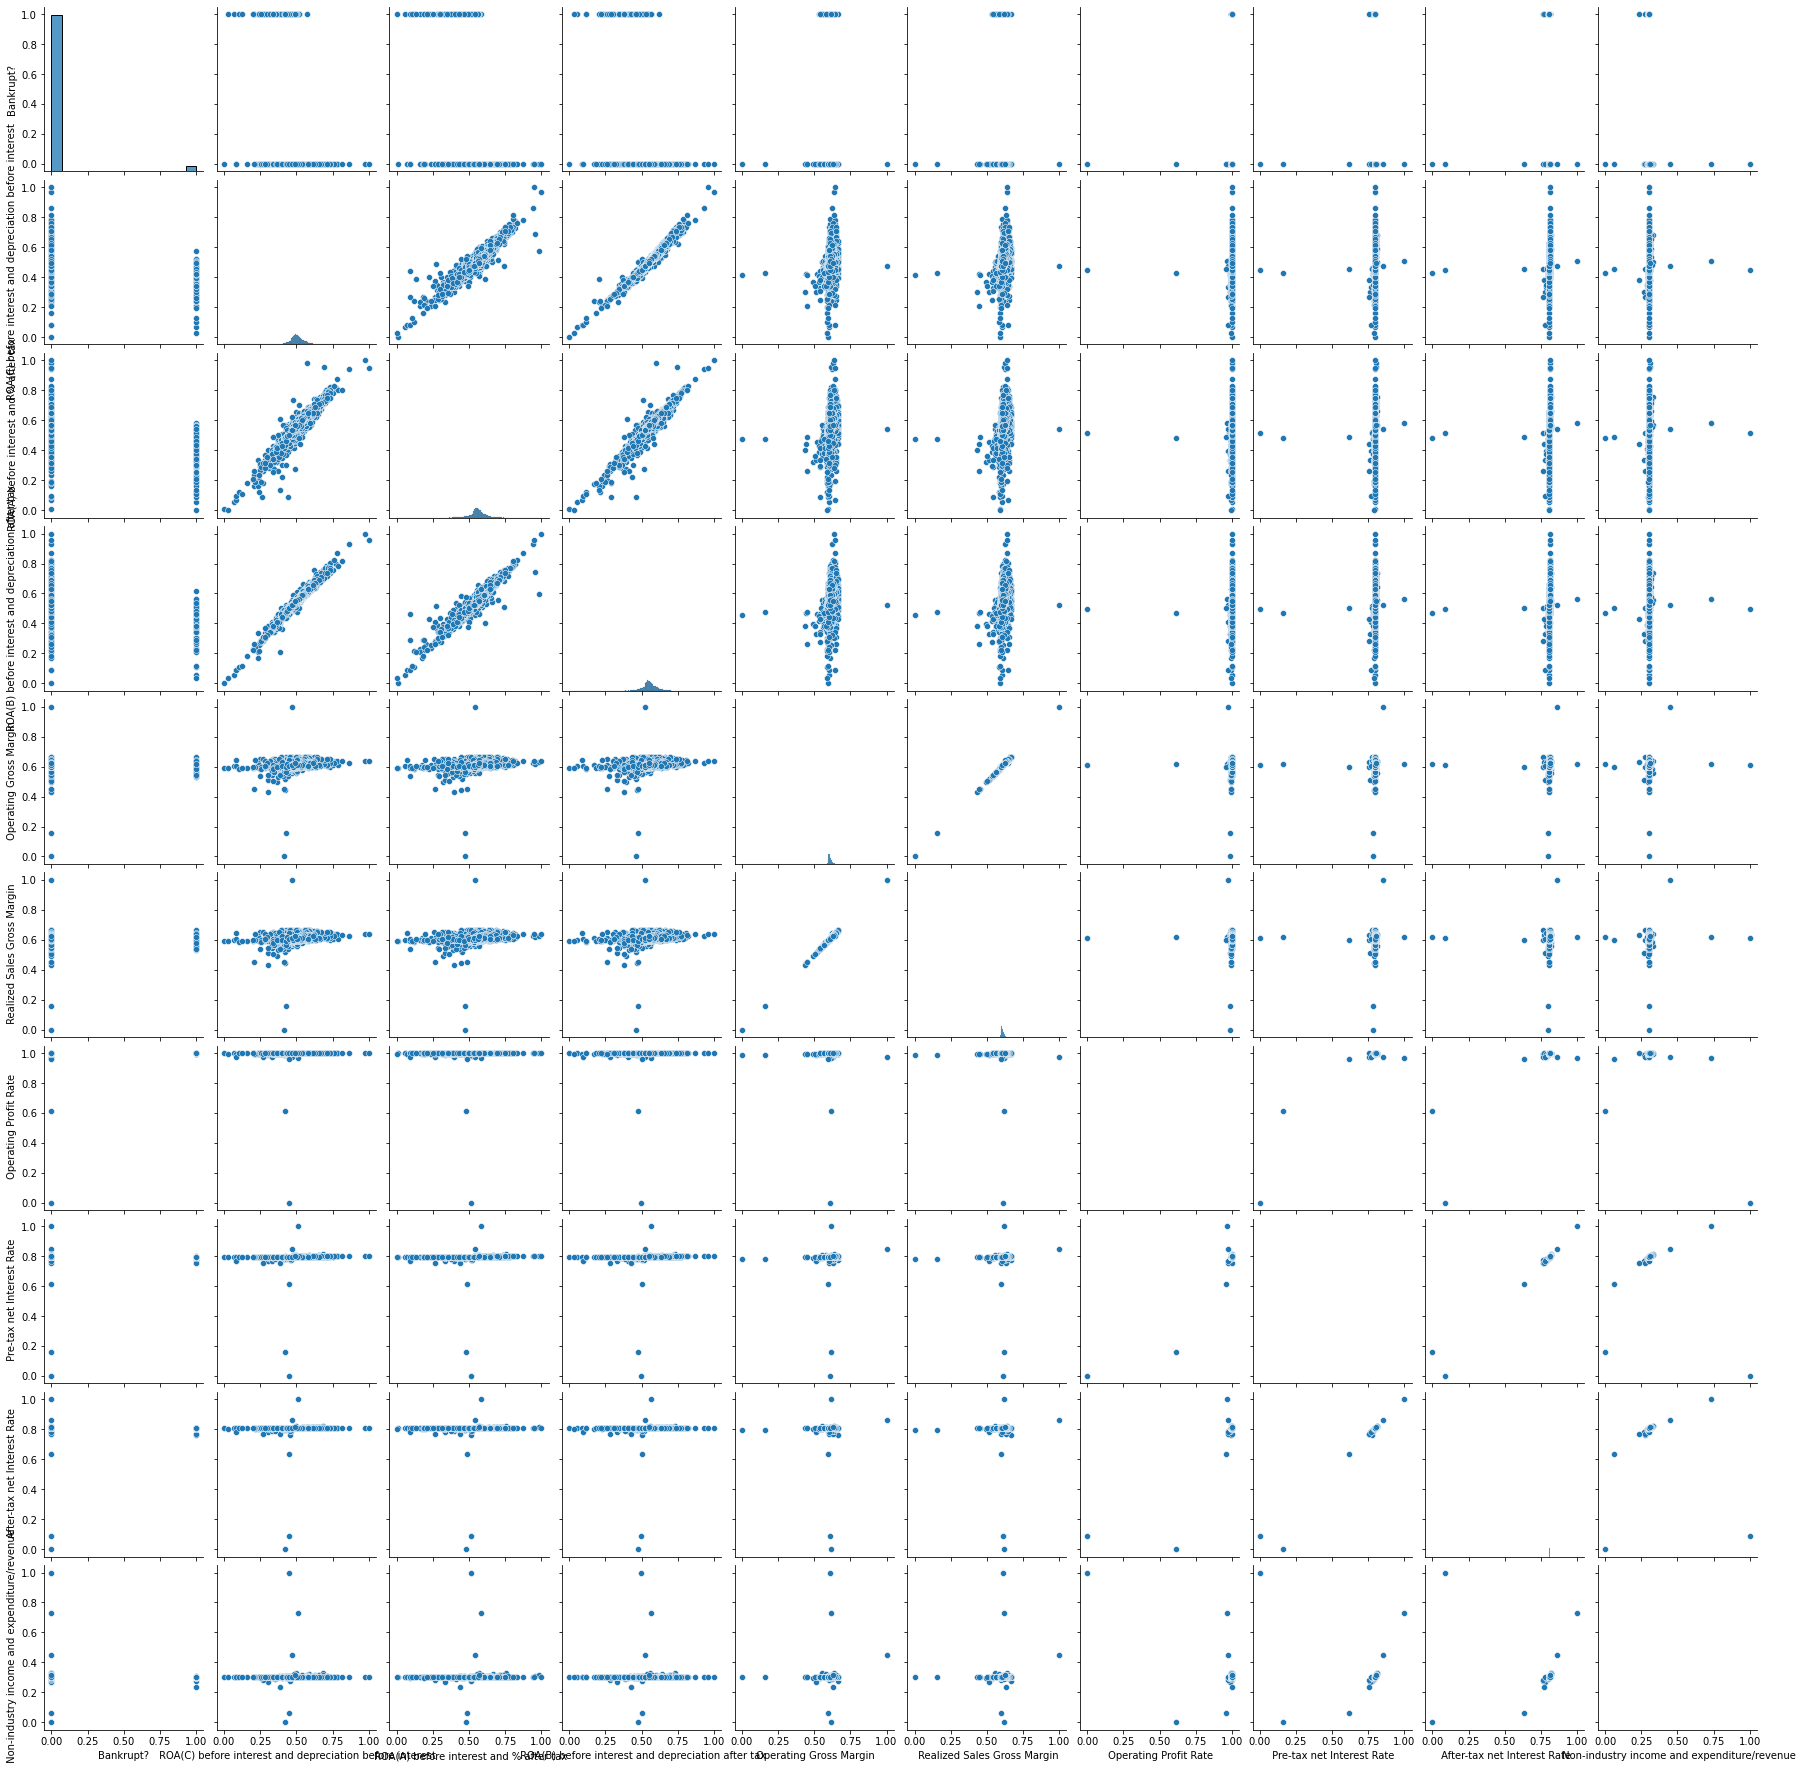

In [22]:
matrix_corr = data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
matrix_corr

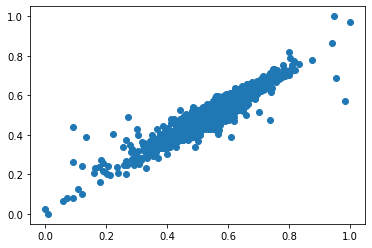

In [23]:
X = data['ROA(A) before interest and % after tax']
y = data['ROA(C) before interest and depreciation before interest']
plt.scatter(X,y);
plt.show()

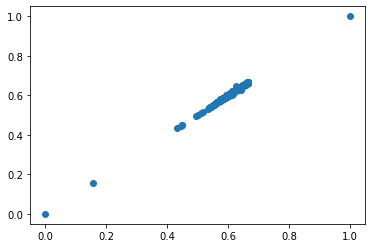

In [24]:
X = data['Operating Gross Margin']
y = data['Realized Sales Gross Margin']
plt.scatter(X,y);
plt.show()

In [25]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

## Presprocessing <a class="anchor" id="chapter2"></a>

### Columns sc<a class="anchor" id="section1"></a>

In [26]:
# Technique 1
# target and columns categorial: 'Bankrupt?', 'Cash flow rate', 'Net Income Flag'
df = pd.read_csv("data/data.csv")
df.columns = [c.replace(" ","", 1) if c.startswith(' ') else c for c in df.columns]
df_2= df[['Operating Expense Rate',\
          'Research and development expense rate',\
          'Interest-bearing debt interest rate',\
          'Revenue Per Share (Yuan ¥)',\
          'Total Asset Growth Rate',\
          'Net Value Growth Rate','Current Ratio',\
          'Quick Ratio','Total debt/Total net worth',\
          'Accounts Receivable Turnover','Average Collection Days',\
          'Inventory Turnover Rate (times)',\
          'Fixed Assets Turnover Frequency','Revenue per person',\
          'Allocation rate per person','Quick Assets/Current Liability',\
          'Cash/Current Liability','Inventory/Current Liability',\
          'Long-term Liability to Current Assets','Fixed Assets to Assets',\
          'Total assets to GNP price']]

In [27]:
df_2.shape

(6819, 21)

In [28]:
std = StandardScaler()
data = std.fit_transform(df_2.iloc[:,1:])
df_std = pd.DataFrame(data,columns=df_2.iloc[:,1:].columns)

df_std[['Bankrupt?','Cash flow rate', 'Net Income Flag']] = df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']]

In [29]:
df_std.shape

(6819, 23)

In [30]:
df_std

,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Fixed Assets to Assets,Total assets to GNP price,Bankrupt?,Cash flow rate,Net Income Flag
0,-0.750713,-0.151921,-0.025697,-0.182259,-0.013721,-0.012111,-0.034237,-0.026226,-0.045967,-0.038333,-0.661726,-0.407123,-0.017024,-0.038222,-0.020937,-0.072818,-0.095887,-0.094979,-0.012111,-0.049491,1,0.458143,1
1,-0.750713,-0.151921,-0.025697,0.207732,-0.013721,-0.012111,-0.034237,-0.026226,-0.045967,-0.038333,2.220288,-0.116896,-0.017024,-0.038222,-0.020937,-0.072818,-0.095887,-0.094979,-0.012111,-0.049491,1,0.461867,1
2,-0.740898,-0.151921,-0.025697,0.611527,-0.013721,-0.012111,-0.034237,-0.026226,-0.045967,-0.038333,-0.641712,0.662558,-0.017024,-0.038222,-0.020937,10.391338,-0.095887,-0.094979,-0.012111,-0.049491,1,0.458521,1
3,-0.750713,-0.151921,-0.025697,-0.216772,-0.013721,-0.012111,-0.034237,-0.026226,-0.045967,-0.038333,1.533654,3.286302,-0.017024,-0.038222,-0.020937,-0.072818,-0.095887,-0.094979,-0.012111,-0.049491,1,0.465705,1
4,-0.750713,-0.151921,-0.025697,0.000657,-0.013721,-0.012111,-0.034237,-0.026226,-0.045967,-0.038333,-0.661726,-0.407123,-0.017024,-0.038222,-0.020937,-0.072818,-0.095887,-0.094979,-0.012111,-0.049491,1,0.462746,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.981322,-0.151921,-0.025697,0.539051,-0.013721,-0.012111,-0.034237,-0.026226,-0.045967,-0.038333,-0.649317,-0.407123,-0.017024,-0.038222,-0.020937,-0.072818,-0.095887,-0.094979,-0.012111,-0.049491,0,0.463734,1
6815,-0.196462,-0.151921,-0.025697,-0.099429,-0.013721,-0.012111,-0.034237,-0.026226,-0.045967,-0.038333,2.398875,-0.407123,-0.017024,-0.038222,-0.020937,-0.072818,-0.095887,-0.094979,-0.012111,-0.049491,0,0.461978,1
6816,-0.750713,-0.151921,-0.025697,0.166317,-0.013721,-0.012111,-0.034237,-0.026226,-0.045967,-0.038333,-0.661726,-0.407123,-0.017024,-0.038222,-0.020937,-0.072818,-0.095887,-0.094979,-0.012111,-0.049491,0,0.472189,1
6817,0.215378,-0.151921,-0.025697,0.601174,-0.013721,-0.012111,-0.034237,-0.026226,-0.045967,-0.038333,0.739253,-0.407123,-0.017024,-0.038222,-0.020937,-0.072818,-0.095887,5.516803,-0.012111,-0.049491,0,0.476123,1


### Columns minmax <a class="anchor" id="section2"></a>

In [31]:
# technique 1
# target and columns categorial: 'Bankrupt?', 'Cash flow rate', 'Net Income Flag'
df = pd.read_csv("data/data.csv")
df.columns = [c.replace(" ","", 1) if c.startswith(' ') else c for c in df.columns]
df_3= df[['ROA(C) before interest and depreciation before interest',\
          'ROA(A) before interest and % after tax',\
          'ROA(B) before interest and depreciation after tax',\
          'Operating Gross Margin',\
          'Realized Sales Gross Margin',\
          'Operating Profit Rate','Pre-tax net Interest Rate',\
          'After-tax net Interest Rate',\
          'Non-industry income and expenditure/revenue',\
          'Continuous interest rate (after tax)',\
          'Tax rate (A)','Net Value Per Share (B)',\
          'Net Value Per Share (A)','Net Value Per Share (C)',\
          'Persistent EPS in the Last Four Seasons',\
          'Per Share Net profit before tax (Yuan ¥)',\
          'Realized Sales Gross Profit Growth Rate',\
          'Operating Profit Growth Rate',\
          'After-tax Net Profit Growth Rate',\
          'Regular Net Profit Growth Rate',\
          'Continuous Net Profit Growth Rate','Total Asset Return Growth Rate Ratio',\
          'Cash Reinvestment %',\
          'Interest Expense Ratio',\
          'Debt ratio %','Net worth/Assets',\
          'Long-term fund suitability ratio (A)',\
          'Borrowing dependency','Contingent liabilities/Net worth',\
          'Operating profit/Paid-in capital','Net profit before tax/Paid-in capital',\
          'Inventory and accounts receivable/Net value','Total Asset Turnover',\
          'Net Worth Turnover Rate (times)','Operating profit per person',\
          'Working Capital to Total Assets','Quick Assets/Total Assets',\
          'Current Assets/Total Assets','Cash/Total Assets',\
          'Current Liability to Assets','Operating Funds to Liability',\
          'Inventory/Working Capital','Retained Earnings to Total Assets',\
          'Total income/Total expense','Total expense/Assets',\
          'Current Asset Turnover Rate','Quick Asset Turnover Rate',\
          'Working capitcal Turnover Rate','Cash Turnover Rate',\
          'Current Liability to Liability','Current Liability to Equity',\
          'Equity to Long-term Liability',\
          'Cash Flow to Total Assets','Cash Flow to Liability',\
          'CFO to Assets','Cash Flow to Equity','Current Liability to Current Assets',\
          'Liability-Assets Flag','Net Income to Total Assets','No-credit Interval',\
          'Gross Profit to Sales','Net Income to Stockholder\'s Equity', 'Liability to Equity',\
          'Degree of Financial Leverage (DFL)',\
          'Interest Coverage Ratio (Interest expense to EBIT)',\
          'Equity to Liability']]

In [32]:
df_3.shape

(6819, 66)

In [33]:
minmax = MinMaxScaler()
data = minmax.fit_transform(df_3.iloc[:,1:])
df_minmax = pd.DataFrame(data,columns=df_3.iloc[:,1:].columns)

df_minmax[['Bankrupt?','Cash flow rate', 'Net Income Flag']] = df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']]

In [34]:
df_minmax.shape

(6819, 68)

In [35]:
matrix_corr_ = df_minmax.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
matrix_corr_

,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Interest Expense Ratio,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Net Worth Turnover Rate (times),Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?,Cash flow rate,Net Income Flag
ROA(A) before interest and % after tax,1.00,0.96,0.33,0.32,0.03,0.05,0.05,0.03,0.05,0.23,0.53,0.53,0.53,0.76,0.75,0.00,0.04,0.13,0.13,0.02,0.08,0.26,0.01,-0.26,0.26,0.02,-0.16,-0.04,0.65,0.76,-0.08,0.22,0.04,0.32,0.30,0.20,0.16,0.22,-0.19,0.35,-0.00,0.72,0.03,-0.36,-0.00,-0.03,0.00,-0.03,0.08,-0.13,-0.10,0.26,0.16,0.44,0.11,-0.20,-0.16,0.96,0.01,0.33,0.29,-0.14,-0.01,0.01,0.06,-0.28,0.29,nan
ROA(B) before interest and depreciation after tax,0.96,1.00,0.33,0.33,0.04,0.05,0.05,0.02,0.05,0.20,0.50,0.50,0.50,0.76,0.72,0.00,0.04,0.12,0.12,0.02,0.08,0.29,0.01,-0.26,0.26,0.00,-0.16,-0.03,0.66,0.73,-0.11,0.19,0.01,0.30,0.26,0.17,0.09,0.23,-0.22,0.39,-0.00,0.67,0.02,-0.32,-0.00,-0.03,0.00,-0.03,0.05,-0.14,-0.08,0.26,0.16,0.50,0.12,-0.16,-0.12,0.91,0.01,0.33,0.28,-0.14,-0.01,0.01,0.06,-0.27,0.32,nan
Operating Gross Margin,0.33,0.33,1.00,1.00,0.01,0.03,0.03,0.05,0.03,0.07,0.14,0.15,0.15,0.26,0.25,0.01,0.02,0.05,0.05,0.01,0.03,0.12,-0.00,-0.25,0.25,0.01,-0.09,-0.02,0.27,0.25,-0.09,-0.10,-0.14,0.22,0.25,0.15,0.09,0.24,-0.20,0.25,-0.04,0.16,0.04,0.23,-0.12,-0.13,0.02,-0.07,0.06,-0.08,-0.07,0.10,0.11,0.23,0.03,-0.13,-0.03,0.30,0.00,1.00,0.08,-0.09,-0.01,-0.00,0.12,-0.10,0.34,nan
Realized Sales Gross Margin,0.32,0.33,1.00,1.00,0.01,0.03,0.03,0.05,0.03,0.07,0.14,0.14,0.14,0.25,0.25,0.01,0.02,0.05,0.05,0.01,0.03,0.12,-0.00,-0.25,0.25,0.01,-0.09,-0.02,0.27,0.25,-0.09,-0.10,-0.14,0.22,0.25,0.15,0.09,0.24,-0.20,0.25,-0.04,0.16,0.04,0.23,-0.12,-0.13,0.02,-0.07,0.06,-0.08,-0.07,0.10,0.11,0.23,0.03,-0.13,-0.03,0.30,0.00,1.00,0.07,-0.09,-0.01,-0.00,0.12,-0.10,0.34,nan
Operating Profit Rate,0.03,0.04,0.01,0.01,1.00,0.92,0.86,-0.59,0.92,0.02,0.02,0.02,0.02,0.02,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,-0.01,-0.00,0.00,0.00,0.02,0.02,0.01,0.03,0.02,0.02,0.03,0.03,0.03,0.01,0.01,0.02,-0.00,0.02,0.00,0.01,0.01,0.01,-0.23,0.02,0.02,0.00,-0.00,0.02,0.00,0.03,0.01,-0.08,-0.00,0.03,0.00,0.01,0.01,0.00,0.00,0.00,-0.02,-0.00,0.02,nan
Pre-tax net Interest Rate,0.05,0.05,0.03,0.03,0.92,1.00,0.99,-0.22,0.99,0.02,0.03,0.03,0.03,0.03,0.03,0.00,0.00,0.04,0.03,0.00,0.01,0.02,0.00,-0.00,0.00,-0.00

<function matplotlib.pyplot.show(close=None, block=None)>

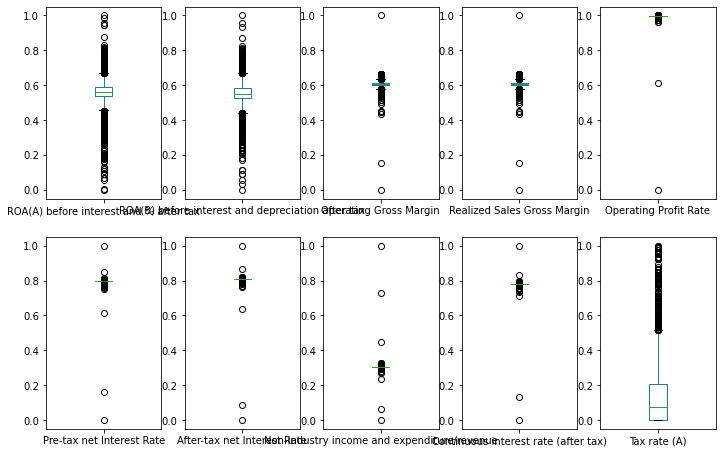

In [36]:
df_10_ = df_minmax.iloc[:,0:10]
df_10_.plot(kind='box', subplots=True, layout=(3, 5), figsize=(12, 12));
plt.show

In [37]:
# Technique 2 (best)
df_copy = df.copy()
#drop target and categorial's columns
df_copy= df.drop(df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']],axis =1)

In [38]:
# Splitting between column with max value <= 1 and max value > 1

# Create 2 lists to store columns name/values
max_1 = []
max_above_1 = []

#Looping through the dataset, populating lists above
for column in df_copy:
    if df[column].max() <= 1:
        max_1.append(df_copy[column])
    else:
        max_above_1.append(df_copy[column])
    

df_20 = pd.DataFrame(max_1).T
df_30 = pd.DataFrame(max_above_1).T

In [39]:
df_20

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Interest Expense Ratio,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Net Worth Turnover Rate (times),Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Working capitcal Turnover Rate,Cash Flow to Sales,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,0.263100,0.363725,0.629951,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.032903,0.392913,0.672775,0.166673,0.190643,0.004094,0.147308,0.334015,0.276920,0.676269,0.721275,0.339077,0.903225,0.002022,0.064856,0.593831,0.671568,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.0,0.716845,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,0.264516,0.376709,0.635172,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.025484,0.391590,0.751111,0.127236,0.182419,0.014948,0.056963,0.341106,0.289642,0.308589,0.731975,0.329740,0.931065,0.002226,0.025516,0.593916,0.671570,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0.0,0.795297,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,0.264184,0.368913,0.629631,0.207516,0.792484,0.005100,0.379093,0.006562,0.092318,0.148036,0.406580,0.014993,0.013387,0.381968,0.829502,0.340201,0.602806,0.000991,0.098162,0.336731,0.277456,0.446027,0.742729,0.334777,0.909903,0.002060,0.021387,0.594502,0.671571,0.446027,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0.0,0.774670,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,0.000000,0.154187,0.154187,0.154187,0.193722,0.321674,0.

In [40]:
df_30.shape

(6819, 24)

In [41]:
std = StandardScaler()
data = std.fit_transform(df_20.iloc[:,1:])
df_std_ = pd.DataFrame(data,columns=df_20.iloc[:,1:].columns)

df_std_[['Bankrupt?','Cash flow rate', 'Net Income Flag']] = df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']]

In [42]:
df_std_.shape

(6819, 71)

In [43]:
df_std_.columns

Index(['ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate',
       'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate',
       'Total Asset Return Growth Rate Ratio', 'Cash Reinvestment %',
       'Interest Expense Ratio', 'Debt ratio %', 'Net worth/Assets',
       'Lon

In [44]:
minmax = MinMaxScaler()
data = minmax.fit_transform(df_30.iloc[:,1:])
df_minmax_ = pd.DataFrame(data,columns=df_30.iloc[:,1:].columns)
#take target in df because the targets remove to df_30 (targets <= 1)
df_minmax_['Bankrupt?'] = df['Bankrupt?']

In [45]:
df_minmax_.shape

(6819, 24)

In [46]:
df_minmax_.columns

Index(['Research and development expense rate',
       'Interest-bearing debt interest rate', 'Revenue Per Share (Yuan ¥)',
       'Total Asset Growth Rate', 'Net Value Growth Rate', 'Current Ratio',
       'Quick Ratio', 'Total debt/Total net worth',
       'Accounts Receivable Turnover', 'Average Collection Days',
       'Inventory Turnover Rate (times)', 'Fixed Assets Turnover Frequency',
       'Revenue per person', 'Allocation rate per person',
       'Quick Assets/Current Liability', 'Cash/Current Liability',
       'Inventory/Current Liability', 'Long-term Liability to Current Assets',
       'Current Asset Turnover Rate', 'Quick Asset Turnover Rate',
       'Cash Turnover Rate', 'Fixed Assets to Assets',
       'Total assets to GNP price', 'Bankrupt?'],
      dtype='object')

### PCA <a class="anchor" id="section3"></a>

In [47]:
# définition de la commande
pca = PCA(n_components=5)

# Sélection des variables quantitatives
dat= df_std_.drop(df_std_[['Bankrupt?','Cash flow rate', 'Net Income Flag']], axis=1)

# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)

# composantes principales
C = pca.fit(data).transform(data)
C

array([[ 7.00241592,  0.21063877,  0.51800816,  1.04718732, -0.75304865],
       [ 2.51578036, -1.00140602,  2.79689437,  1.25460787, -1.62615225],
       [ 3.89247942, -0.44519561,  0.32989038,  0.55347703, -0.64626109],
       ...,
       [-2.0808495 , -1.41432643,  1.45639287, -1.24915469,  0.38487104],
       [-1.74820405, -0.20194519,  0.29998894, -0.39939993,  0.12484343],
       [-1.55860398, -2.13865885,  0.38927518, -2.98650198,  1.30654629]])

In [48]:
std_pca = pd.DataFrame(C)

In [49]:
std_pca[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']] = df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']]

In [50]:
std_pca

,0,1,2,3,4,Bankrupt?,Cash flow rate,Net Income Flag
0,7.002416,0.210639,0.518008,1.047187,-0.753049,1,0.458143,1
1,2.515780,-1.001406,2.796894,1.254608,-1.626152,1,0.461867,1
2,3.892479,-0.445196,0.329890,0.553477,-0.646261,1,0.458521,1
3,5.358008,-1.373354,1.278493,1.082875,-1.146190,1,0.465705,1
4,2.196216,-0.606590,-0.327241,0.466398,-0.303600,1,0.462746,1
...,...,...,...,...,...,...,...,...
6814,1.247610,-0.474437,-0.267197,0.034211,-0.122485,0,0.463734,1
6815,1.110003,-0.705685,0.051719,0.285129,-0.337483,0,0.461978,1
6816,-2.080849,-1.414326,1.456393,-1.249155,0.384871,0,0.472189,1
6817,-1.748204,-0.201945,0.299989,-0.399400,0.124843,0,0.476123,1


In [51]:
# définition de la commande
pca = PCA(n_components=5)

# Sélection des variables quantitatives
dat= df_minmax_.drop(df_minmax_[['Bankrupt?']], axis=1)

# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)

# composantes principales
C = pca.fit(data).transform(data)
C

array([[-0.67535678,  0.47102098,  0.43935798,  0.2933456 , -0.02464608],
       [-0.41326658, -0.24513228, -0.31932197, -0.68469457,  1.11563881],
       [ 0.82689381,  0.73632624,  5.40496761, -4.37241136, -0.2097947 ],
       ...,
       [ 0.65512166, -0.0122676 ,  0.50144177,  0.32662479, -0.22910178],
       [ 0.88738261, -0.6187085 , -0.12017056, -0.64139277,  0.49091393],
       [ 0.68661494, -0.21443263,  0.92407778,  1.37377631,  0.30552698]])

In [52]:
minmax_pca = pd.DataFrame(C)

In [53]:
minmax_pca[['Bankrupt?']] = df[['Bankrupt?']]

In [54]:
minmax_pca

,0,1,2,3,4,Bankrupt?
0,-0.675357,0.471021,0.439358,0.293346,-0.024646,1
1,-0.413267,-0.245132,-0.319322,-0.684695,1.115639,1
2,0.826894,0.736326,5.404968,-4.372411,-0.209795,1
3,-1.434121,0.245845,0.020421,-0.385649,-0.378555,1
4,-1.723219,0.931141,0.449301,0.394764,-0.202597,1
...,...,...,...,...,...,...
6814,0.662666,-0.338979,-0.124333,0.077868,-0.504152,0
6815,0.460895,-0.775116,-0.920889,-0.788864,1.267511,0
6816,0.655122,-0.012268,0.501442,0.326625,-0.229102,0
6817,0.887383,-0.618708,-0.120171,-0.641393,0.490914,0


In [69]:
df_full = std_pca.merge(minmax_pca, left_index=True, right_index= True, how='left')
df_full

,0_x,1_x,2_x,3_x,4_x,Bankrupt?_x,Cash flow rate,Net Income Flag,0_y,1_y,2_y,3_y,4_y,Bankrupt?_y
0,7.002416,0.210639,0.518008,1.047187,-0.753049,1,0.458143,1,-0.675357,0.471021,0.439358,0.293346,-0.024646,1
1,2.515780,-1.001406,2.796894,1.254608,-1.626152,1,0.461867,1,-0.413267,-0.245132,-0.319322,-0.684695,1.115639,1
2,3.892479,-0.445196,0.329890,0.553477,-0.646261,1,0.458521,1,0.826894,0.736326,5.404968,-4.372411,-0.209795,1
3,5.358008,-1.373354,1.278493,1.082875,-1.146190,1,0.465705,1,-1.434121,0.245845,0.020421,-0.385649,-0.378555,1
4,2.196216,-0.606590,-0.327241,0.466398,-0.303600,1,0.462746,1,-1.723219,0.931141,0.449301,0.394764,-0.202597,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,1.247610,-0.474437,-0.267197,0.034211,-0.122485,0,0.463734,1,0.662666,-0.338979,-0.124333,0.077868,-0.504152,0
6815,1.110003,-0.705685,0.051719,0.285129,-0.337483,0,0.461978,1,0.460895,-0.775116,-0.920889,-0.788864,1.267511,0
6816,-2.080849,-1.414326,1.456393,-1.249155,0.384871,0,0.472189,1,0.655122,-0.012268,0.501442,0.326625,-0.229102,0
6817,-1.748204,-0.201945,0.299989,-0.399400,0.124843,0,0.476123,1,0.887383,-0.618708,-0.120171,-0.641393,0.490914,0


In [75]:
bankurpt_dataset = df_full.drop('Bankrupt?_y',axis =1)
bankurpt_dataset

,0_x,1_x,2_x,3_x,4_x,Bankrupt?_x,Cash flow rate,Net Income Flag,0_y,1_y,2_y,3_y,4_y
0,7.002416,0.210639,0.518008,1.047187,-0.753049,1,0.458143,1,-0.675357,0.471021,0.439358,0.293346,-0.024646
1,2.515780,-1.001406,2.796894,1.254608,-1.626152,1,0.461867,1,-0.413267,-0.245132,-0.319322,-0.684695,1.115639
2,3.892479,-0.445196,0.329890,0.553477,-0.646261,1,0.458521,1,0.826894,0.736326,5.404968,-4.372411,-0.209795
3,5.358008,-1.373354,1.278493,1.082875,-1.146190,1,0.465705,1,-1.434121,0.245845,0.020421,-0.385649,-0.378555
4,2.196216,-0.606590,-0.327241,0.466398,-0.303600,1,0.462746,1,-1.723219,0.931141,0.449301,0.394764,-0.202597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,1.247610,-0.474437,-0.267197,0.034211,-0.122485,0,0.463734,1,0.662666,-0.338979,-0.124333,0.077868,-0.504152
6815,1.110003,-0.705685,0.051719,0.285129,-0.337483,0,0.461978,1,0.460895,-0.775116,-0.920889,-0.788864,1.267511
6816,-2.080849,-1.414326,1.456393,-1.249155,0.384871,0,0.472189,1,0.655122,-0.012268,0.501442,0.326625,-0.229102
6817,-1.748204,-0.201945,0.299989,-0.399400,0.124843,0,0.476123,1,0.887383,-0.618708,-0.120171,-0.641393,0.490914


In [77]:
#create new df
#bankurpt_dataset.to_csv('bankurpt_dataset.csv', index=False)

### df sans PCA <a class="anchor" id="section4"></a>

In [78]:
df_std_

,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Interest Expense Ratio,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Net Worth Turnover Rate (times),Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Working capitcal Turnover Rate,Cash Flow to Sales,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?,Cash flow rate,Net Income Flag
0,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.471371,-1.375150,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.119118,-0.769297,-0.092520,1.750845,-1.750845,-0.133505,0.959784,0.041865,-0.471275,-1.460495,-0.332027,-0.540344,-0.155185,-0.237123,-2.393729,-1.155833,-1.520572,-0.861820,1.126267,-0.563752,-0.045371,-0.412896,-1.245334,0.568487,-1.232594,-0.043610,1.314027,-0.019619,0.003948,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-0.034272,-2.254317,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,1,0.458143,1
1,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.550058,-0.435312,-0.027130,0.010035,0.039473,0.039663,-0.001930,0.027847,-0.143117,0.372093,1.075727,-1.075727,-0.132282,0.129305,-0.010932,-0.548362,-0.446793,-0.355356,-0.762702,-0.357471,-0.277557,-1.067133,-1.351081,-1.558280,-0.783873,-0.670363,-0.361990,1.169887,-2.192039,-0.328953,-0.123797,-0.143474,-0.026740,-0.135126,-0.010126,0.004193,-2.192039,-0.123797,0.269947,-0.182201,-0.095129,-0.449376,-0.109511,0.527485,-0.034272,-0.309033,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573,1,0.461867,1
2,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,-0.829388,-0.381876,-0.380102,0.090822,-1.450153,-0.930172,-0.599601,-1.252562,0.029163,0.010605,0.022853,0.022981,-0.003748,-0.006595,-0.519094,-0.120983,1.749724,-1.749724,-0.130825,0.272560,0.048714,-0.599655,-1.126595,0.309321,-1.251890,-0.687284,-0.571652,0.260402,-0.296712,0.369252,-0.884109,0.148933,-0.486462,0.005772,-1.526996,0.591934,0.249651,-0.971327,-0.040430,-0.287204,0.055319,0.004340,-1.526996,0.249651,0.116638,-0.147060,-0.086679,-0.937979,-0.082328,-0.199721,-0.034272,-0.820510,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,-0.621960

In [79]:
df_minmax_

,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price,Bankrupt?
0,0.000000e+00,7.323965e-13,5.814497e-12,0.498498,3.504580e-14,8.214412e-13,1.308510e-13,2.139429e-12,1.862304e-13,3.584136e-13,1.822749e-14,1.166173e-14,3.877887e-12,3.880387e-12,2.263913e-13,1.526798e-14,1.045399e-13,2.682638e-12,7.010000e-02,6.550000e-01,4.580000e-02,5.098627e-11,9.388432e-13,1
1,0.000000e+00,6.536007e-13,7.001435e-12,0.611612,4.748554e-14,2.187711e-12,4.376345e-13,1.257786e-12,1.320694e-13,5.053246e-13,9.369369e-01,7.197197e-02,7.819127e-13,1.288921e-12,4.689376e-13,1.434104e-13,5.256995e-13,2.510149e-12,1.065198e-14,7.700000e-01,2.490000e-01,5.634953e-11,8.475867e-13,1
2,2.555110e-03,7.980596e-13,1.968215e-12,0.728729,4.248932e-14,4.197292e-12,5.793673e-13,2.137594e-12,1.535255e-13,4.344141e-13,6.506507e-03,2.652653e-01,3.291369e-12,1.473525e-11,7.145671e-13,5.533679e-01,1.400483e-12,3.894251e-13,1.791094e-13,1.022676e-13,7.610000e-02,3.319462e-11,4.073610e-12,1
3,0.000000e+00,4.535807e-13,4.757771e-12,0.488488,4.098884e-14,1.525112e-12,3.138127e-13,9.630183e-13,2.018538e-13,3.304180e-13,7.137137e-01,9.159159e-01,1.755219e-12,2.227794e-12,3.357412e-13,1.047302e-13,3.572299e-13,2.323396e-12,8.140000e-01,6.050000e-01,2.030000e-01,6.720480e-11,3.312093e-13,1
4,0.000000e+00,6.929986e-13,9.831057e-12,0.551552,4.704690e-14,2.189980e-12,4.038404e-13,5.180684e-13,1.487343e-13,4.488068e-13,1.635310e-14,2.938149e-14,6.596075e-12,2.506605e-12,4.846679e-13,7.051436e-14,4.912785e-13,0.000000e+00,6.680000e-01,5.050000e-01,8.240000e-02,3.720612e-11,3.948639e-13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,4.509018e-01,1.808262e-13,6.876231e-12,0.707708,4.825049e-14,3.800187e-12,5.912629e-13,6.695349e-13,7.082588e-14,9.431613e-13,4.034034e-03,1.431212e-14,7.205600e-13,6.596106e-13,6.200901e-13,5.255491e-13,1.333182e-12,1.878655e-13,2.294154e-14,1.244230e-14,1.077940e-14,4.811756e-11,4.740433e-14,0
6815,1.442886e-01,2.394179e-13,7.632466e-12,0.522523,4.774498e-14,3.367001e-12,7.303597e-13,4.651332e-13,6.728459e-14,9.919561e-13,9.949950e-01,6.058040e-14,1.825574e-12,3.554048e-13,7.698079e-13,4.898633e-13,6.791251e-13,2.310977e-13,1.517299e-14,1.173396e-14,7.710000e-01,1.155486e-11,1.995150e-13,0
6816,1.041169e-14,0.000000e+00,1.465393e-11,0.599600,4.667513e-14,1.397222e-11,3.804075e-12,1.399987e-13,1.549837e-13,4.303771e-13,2.800109e-14,1.025323e-13,2.508122e-12,2.898618e-13,4.028491e-12,9.141190e-12,7.880734e-13,0.000000e+00,1.762272e-14,1.749713e-14,4.074263e-14,6.671740e-12,2.891940e-13,0
6817,2.515030e-01,2.131526e-13,1.044206e-11,0.725726,5.666490e-14,4.648177e-12,7.861201e-13,3.839413e-13,7.353393e-14,9.074428e-13,4.554555e-01,2.332345e-14,1.447122e-12,7.825082e-13,8.790596e-13,7.391936e-13,1.345473e-12,3.354298e-01,2.135940e-14,1.351937e-14,1.165392e-14,2.966405e-11,2.889201e-13,0


In [85]:
data = df_std_.merge(df_minmax_, left_index=True, right_index= True, how='left')

In [88]:
dataset = data.drop('Bankrupt?_x',axis =1)
dataset

,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Interest Expense Ratio,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Net Worth Turnover Rate (times),Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Working capitcal Turnover Rate,Cash Flow to Sales,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Cash flow rate,Net Income Flag,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price,Bankrupt?_y
0,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.471371,-1.375150,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.119118,-0.769297,-0.092520,1.750845,-1.750845,-0.133505,0.959784,0.041865,-0.471275,-1.460495,-0.332027,-0.540344,-0.155185,-0.237123,-2.393729,-1.155833,-1.520572,-0.861820,1.126267,-0.563752,-0.045371,-0.412896,-1.245334,0.568487,-1.232594,-0.043610,1.314027,-0.019619,0.003948,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-0.034272,-2.254317,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,0.458143,1,0.000000e+00,7.323965e-13,5.814497e-12,0.498498,3.504580e-14,8.214412e-13,1.308510e-13,2.139429e-12,1.862304e-13,3.584136e-13,1.822749e-14,1.166173e-14,3.877887e-12,3.880387e-12,2.263913e-13,1.526798e-14,1.045399e-13,2.682638e-12,7.010000e-02,6.550000e-01,4.580000e-02,5.098627e-11,9.388432e-13,1
1,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.550058,-0.435312,-0.027130,0.010035,0.039473,0.039663,-0.001930,0.027847,-0.143117,0.372093,1.075727,-1.075727,-0.132282,0.129305,-0.010932,-0.548362,-0.446793,-0.355356,-0.762702,-0.357471,-0.277557,-1.067133,-1.351081,-1.558280,-0.783873,-0.670363,-0.361990,1.169887,-2.192039,-0.32

In [90]:
#create new df
#dataset.to_csv('dataset_nopca.csv', index=False)